In [1]:
import pandas as pd
df = pd.read_csv("csv_folder/greek_proverbs_human_clustering.csv")


print(df.head(5))

                                                text  f3352321  f3352310  \
0            Όποιος δεν τον ξέρ΄ ακριβά τον αγοράζει         1       1.0   
1                            Τα 'θελες και τα 'παθες         1       5.0   
2             Αδειανός μασκαράς, παραχέρ 'τ' χουριού         3       1.0   
3  Ξεπεσομένος άρχοντας, ζωντανοκολασμένος, λιοντ...         3       1.0   
4          Κάλλιο γαιδουρόδερνε, παρά γαιδουρογύρευε         2       2.0   

   f3352311  f3352316 f3352318  f3352314  f3352315  f3352301  f3352308  \
0         2         2        6         1         6         1         1   
1        17         9        5         2         5         3         1   
2        16         1        6         3        10         3         1   
3         1         1        6         3         2         4         4   
4         1         3        6         2         8         1         2   

   f3352307  
0         1  
1         2  
2         3  
3         4  
4         5  


##### It is actually known to as from homework that the annotator with student id f3352318 actually used the format 3, 4 indicating common clustering regarding both cluster 3 and cluster 4

In [2]:
# Find what values do differ
df.f3352318.value_counts()

6        75
5         7
1         5
4         5
2         4
3         2
2, 3      1
3, 4      1
Name: f3352318, dtype: int64

##### We need to have one cluster id per cell

so one way to fix this is to assign the first cluster entered in both the problematic cells.

In [3]:
# Transform column to object 
df.f3352318 = df.f3352318.astype(str)

# Create a mask to identify cells with multiple integers
mask = df['f3352318'].apply(lambda x: isinstance(x, str) and ',' in x)


# Use df.loc to change the values in the selected cells
df.loc[mask, 'f3352318'] = df.loc[mask, 'f3352318'].apply(lambda x: int(x.split(', ')[0]))

# re-transform column back to normal
df.f3352318 = df.f3352318.astype('int64')


In [4]:
df.f3352318.value_counts()

6    75
5     7
1     5
4     5
2     5
3     3
Name: f3352318, dtype: int64

In [5]:
# Let's check all the data types of all cols
df.dtypes


text         object
f3352321      int64
f3352310    float64
f3352311      int64
f3352316      int64
f3352318      int64
f3352314      int64
f3352315      int64
f3352301      int64
f3352308      int64
f3352307      int64
dtype: object

##### It is better to have a uniformal data type for columns explaining  similar values.

So let's fix that:

In [6]:
# Start from the second column excluding 'text'
for col in df.iloc[:, 1:]:
    # Change the type of each column to match that of 'int64'
    df[col] = df[col].astype('int64')

In [7]:
df.dtypes

text        object
f3352321     int64
f3352310     int64
f3352311     int64
f3352316     int64
f3352318     int64
f3352314     int64
f3352315     int64
f3352301     int64
f3352308     int64
f3352307     int64
dtype: object

In [8]:
print(f"A total of {df.isna().sum().sum()} are NaN values in our dataframe object")

A total of 0 are NaN values in our dataframe object


Before we continue it would be wise to check if there are any unexpected values imported by our annotators.|

In [12]:

for column in df.columns[1:]:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print()

Value counts for f3352321:
1    50
2    20
3    12
4    11
6     5
5     2
Name: f3352321, dtype: int64

Value counts for f3352310:
 1    38
 5    28
 2    16
 4     8
 3     8
-1     2
Name: f3352310, dtype: int64

Value counts for f3352311:
8     12
1     10
17    10
6      8
16     7
9      7
3      7
4      6
2      5
7      5
10     5
12     5
5      5
11     3
13     2
15     2
14     1
Name: f3352311, dtype: int64

Value counts for f3352316:
6     13
50    11
17     9
9      9
2      8
10     7
15     7
5      6
11     5
12     4
14     4
16     4
8      4
7      3
1      2
18     2
13     1
3      1
Name: f3352316, dtype: int64

Value counts for f3352318:
6    75
5     7
1     5
4     5
2     5
3     3
Name: f3352318, dtype: int64

Value counts for f3352314:
2    20
4    20
8    17
3    12
6    10
1     6
9     5
5     5
7     5
Name: f3352314, dtype: int64

Value counts for f3352315:
10    27
7     20
2     18
4      7
5      6
3      6
6      5
1      5
8      4
9      2
Name


After performing the value counts of each and every one of the annotators.

It is apparent to us that annotator with name f3352310 clustered 2 different proverbs with am unexpected negative value of -1.

We need to fix that!

In [13]:
# Replace the -1 label with the most frequent cluster id = 1
df.f3352310 = df.f3352310.replace(-1, 1)

In [14]:
df.f3352310.value_counts()

1    40
5    28
2    16
4     8
3     8
Name: f3352310, dtype: int64

Above, it is visible that the two values of -1 are missing and cluster id has 2 more entries.

Now, our csv file is in valid shape to continue. 

But first we should submit the changes to our csv. Meaning we will update the file.

In [15]:
df.to_csv('csv_folder/greek_proverbs_human_clustering_new.csv', index=False) # 

<h2 align='center'>A. Assesing the human-based grouping</h2>

In [16]:
df = pd.read_csv('csv_folder/greek_proverbs_human_clustering_new.csv')
from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score
import itertools

# Store the columns
annotators = df.iloc[:, 1:].columns

i=0

# Creat a list to store combinations and scores
results = []

# Calculate pairwise MI and AMI
# combinations are create by itertools
for annotator1, annotator2 in itertools.combinations(annotators, 2):
    mi_score = mutual_info_score(df[annotator1], df[annotator2])
    ami_score = adjusted_mutual_info_score(df[annotator1], df[annotator2])
    i += 1
    
    
    combination = f"{annotator1} - {annotator2}"  # Convert to a string
    results.append({'Combination': combination, 'MI Score': mi_score, 'AMI Score': ami_score})

# Create a DataFrame from the list of dictionaries
df_scores = pd.DataFrame(results)

# Display the results
df_scores.head(10)
    

Combination  MI Score  AMI Score
0  f3352321 - f3352310  0.426390   0.243895
1  f3352321 - f3352311  0.637077   0.153690
2  f3352321 - f3352316  0.672323   0.169606
3  f3352321 - f3352318  0.185255   0.060746
4  f3352321 - f3352314  0.563820   0.233746
5  f3352321 - f3352315  0.248015   0.015422
6  f3352321 - f3352301  0.378869   0.122208
7  f3352321 - f3352308  0.396358   0.143582
8  f3352321 - f3352307  0.860040   0.043628
9  f3352310 - f3352311  0.511543   0.094925

#### Number of possible combinations should be exactly: 
    C(10, 2) = 10! / (2!(10-2)!) = (10 * 9) / (2 * 1) = 45

In [17]:
print(i)

45


So, all combination of students were tested!

In [18]:
import plotly.express as px
fig = px.bar(
    df_scores,
    x='MI Score',
    y='Combination',
    orientation='h',
    title='Pairwise MI Scores between Annotators'
)

# Customize the hover label
fig.update_traces(
    hovertemplate='<b>%{y}</b><br>MI Score: %{x:.2f}'
)

# Show the interactive Plotly figure
fig.show()

In [19]:
import plotly.express as px
fig = px.bar(
    df_scores,
    x='AMI Score',
    y='Combination',
    orientation='h',
    title='Pairwise AMI Scores between Annotators'
)

# Customize the hover label
fig.update_traces(
    hovertemplate='<b>%{y}</b><br>MI Score: %{x:.2f}'
)

# Show the interactive Plotly figure
fig.show()

### Report/Discussion

Mutual Information (MI) and Adjusted Mutual Information (AMI) are metrics used to assess agreement among annotators. MI quantifies the information shared between annotators, with a high score indicating strong agreement. AMI, an adjusted version of MI, addresses chance agreement and provides normalized scores between 0 and 1, making it more suitable for multiple annotators. AMI corrects for the expected agreement by chance, ensuring a more accurate representation of true agreement, especially in contexts involving multiple annotators. While MI offers a straightforward measure of agreement, AMI's normalization and correction for chance agreement make it valuable in assessing reliability and consistency in annotations

<h2 align='center'>B. Estimating the ground truth</h2>

In [20]:
import itertools

# Get the list of column names starting from the second column
columns = df.columns[1:]

# Initialize an empty DataFrame to store the results
matrix_size = len(df)
matrix = pd.DataFrame(0, index=df['text'], columns=df['text'], dtype=float)

# Create all possible pairs of annotators
annotator_pairs = list(itertools.combinations(columns, 2))

# Calculate the probability for each pair of proverbs
for i in range(matrix_size):
    for j in range(i, matrix_size):
        # Initialize a counter for the frequency that any two annotators would independently place the two proverbs in the same cluster
        independent_common_class_counter = 0

        # Calculate the frequency that any two annotators would independently place the two proverbs in the same cluster.
        for annotator1, annotator2 in annotator_pairs:
            # Get the cluster annotations for proverbs i and j by annotator1 and annotator2
            cluster_i_annotator1 = df.at[i, annotator1]
            cluster_j_annotator1 = df.at[j, annotator1]
            cluster_i_annotator2 = df.at[i, annotator2]
            cluster_j_annotator2 = df.at[j, annotator2]

            # If the clusters assigned by annotator1 and annotator2 are the same, increment the counter
            if (cluster_i_annotator1 == cluster_j_annotator1) and (cluster_i_annotator2 == cluster_j_annotator2):
                independent_common_class_counter += 1

        # Calculate the probability by normalizing the counter by the total number of annotator pairs
        probability = independent_common_class_counter / len(annotator_pairs)

        # Populate the symmetric positions (i, j) and (j, i) in the matrix with the calculated probability
        matrix.iloc[i, j] = probability
        matrix.iloc[j, i] = probability

# Print the resulting probability matrix
print("Probability Matrix:")
print(matrix.head(1))

Probability Matrix:
text                                     Όποιος δεν τον ξέρ΄ ακριβά τον αγοράζει  \
text                                                                               
Όποιος δεν τον ξέρ΄ ακριβά τον αγοράζει                                      1.0   

text                                     Τα 'θελες και τα 'παθες  \
text                                                               
Όποιος δεν τον ξέρ΄ ακριβά τον αγοράζει                 0.022222   

text                                     Αδειανός μασκαράς, παραχέρ 'τ' χουριού  \
text                                                                              
Όποιος δεν τον ξέρ΄ ακριβά τον αγοράζει                                0.066667   

text                                     Ξεπεσομένος άρχοντας, ζωντανοκολασμένος, λιοντάρι ψόφιο, χαρτί μουρδουλωμένο  \
text                                                                                                                    
Όποιος δεν τον ξέρ΄ ακριβά τον

In [21]:
import numpy as np
# Dump headers and index
probability_matrix = matrix.values
probability_matrix = np.array(probability_matrix)
# Fill the diagonal with zeros
# Fill the diagonal with zeros

np.fill_diagonal(probability_matrix, 0)
print(f"Maximum probability should be: {probability_matrix.max()}")


Maximum probability should be: 0.8


For a better understanding of our 100x100 matrix we should know if this matrix is symmetric.

In [22]:
import numpy as np
# Covert to np array and check if it equals it's transpose
def is_symmetric(matrix):
    # Convert the matrix to a NumPy array
    matrix = np.array(matrix)
    return np.array_equal(matrix, matrix.T)

if is_symmetric(probability_matrix):
    print("The matrix is symmetric.")
else:
    print("The matrix is not symmetric.")

The matrix is symmetric.


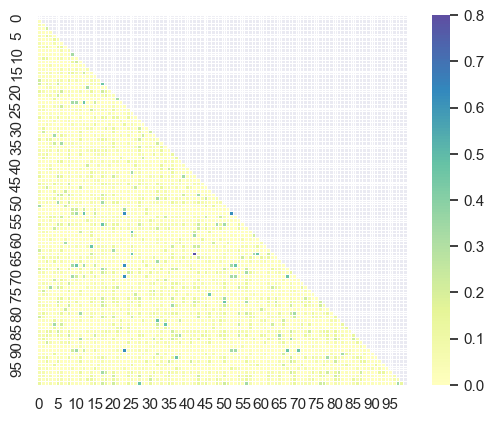

In [23]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


sns.set_theme(style="darkgrid")
mask = np.zeros_like(probability_matrix)  # Generating a mask for the upper
mask[np.triu_indices_from(mask)] = True

# Choose a different seaborn color palette
cmap = sns.color_palette("Spectral", as_cmap=True)  # Generating a custom diverging colormap

# Draw the heatmap, including the mask and custom fixes (e.g., the line width or the color bar)
sns.heatmap(probability_matrix, mask=mask, cmap=cmap, vmax=0.8, center=0, square=True, linewidths=.5)

# Show the plot
plt.show()


This heatmap is an effective way to visualize a 100x100 symmetric probability matrix for several reasons. The use of a dark grid background enhances contrast and readability, while the exclusion of the upper triangle minimizes redundancy in the symmetric matrix. The chosen "Spectral" color palette provides a perceptually uniform and distinct representation of positive and negative probabilities. The square aspect ratio maintains a balanced and aesthetically pleasing layout, crucial for symmetric matrices. The color intensity is appropriately scaled with `vmax=1`, ensuring a comprehensive view of the entire probability range. Overall, this heatmap combines clarity, symmetry, and a visually appealing color scheme to convey complex probability relationships in a concise and interpretable manner.

<h2 align='center'>C. Clustering</h2>

### Following we will be having the different persona clusterings generated by the large language model GPT.

##### Note: the 5 different personas where randomly generated by GPT after the instruction to do so!

Firstly we instructed each gpt-persona to translate all 100 proverbs to English. All of them were translated.

Prompt about clustering (same for every gpt-persona): 

    I need you to create a clusters and assign each proverb to these clusters. 
    Also, each proverb should be assign to at least one cluster

    Answer it like cluster 1 : name of cluster
    contains: (number of proverb)

Note: In the above prompt, only the number of clusters changes from persona to persona in order to simulate different "human" annotators with unique ways of clustering.

#### 1st-Persona: 19th-century English botanist named Emily.

#### 1st-Persona clustering:

Cluster 1: Wisdom and Observations

1, 2, 7, 12, 13, 15, 23, 28, 29, 32, 38, 40, 44, 46, 53, 56, 63, 64, 65, 66, 73, 74, 79, 87, 88, 89, 91, 93

Cluster 2: Fate and Fortune

4, 14, 19, 50, 67

Cluster 3: Human Nature and Relationships

3, 8, 16, 22, 24, 26, 35, 41, 43, 51, 55, 58, 61, 75, 78, 85, 98

Cluster 4: Hard Work and Diligence

9, 18, 21, 33, 39, 42, 55, 70, 77, 86, 92

Cluster 5: Social Observations

5, 6, 10, 11, 27, 31, 37, 45, 49, 60, 68, 69, 76, 80, 83, 84, 95

Cluster 6: Financial Wisdom

25, 36, 47, 48, 52, 97

Cluster 7: Family and Relationships

30, 34, 59, 62, 94

Cluster 8: Superstition and Folk Beliefs

54, 57, 72, 91

Cluster 9: Irony and Contradictions

17, 20, 59, 82, 100

Cluster 10: Humor and Satire

27, 45, 50, 71, 76, 87

#### 2nd-Persona: 18th-century English Governess.

#### 2nd-Persona clustering:

Cluster 1: Wisdom of Experience

Contains proverbs: 1, 4, 8, 16, 17, 32, 37, 41, 50, 52, 56, 57, 59, 62, 66, 67, 73, 76, 78, 79, 83, 84, 86, 91

Cluster 2: Life's Choices and Consequences

Contains proverbs: 2, 7, 11, 23, 28, 39, 42, 43, 45, 48, 53, 58, 63, 64, 68, 69, 70, 75, 81, 89

Cluster 3: Wealth and Poverty

Contains proverbs: 8, 9, 18, 27, 31, 38, 47, 55, 56, 63, 64, 66, 71, 82, 95

Cluster 4: Human Nature and Relationships

Contains proverbs: 3, 5, 14, 21, 26, 29, 36, 40, 44, 46, 51, 60, 61, 74, 77, 80, 85, 87, 88, 90, 92, 93, 94, 98

Cluster 5: Fate and Destiny

Contains proverbs: 13, 14, 23, 25, 31, 42, 47, 56, 57, 58, 64, 67, 71, 94

Cluster 6: Traditions and Customs

Contains proverbs: 10, 15, 20, 30, 33, 49, 54, 65, 69, 72, 76, 81, 97

Cluster 7: Hard Work and Diligence

Contains proverbs: 22, 23, 35, 55, 58, 67, 87

Cluster 8: Family and Marriage

Contains proverbs: 13, 26, 42, 43, 60, 65, 77, 92

Cluster 9: Nature and Weather

Contains proverbs: 71, 72, 92

Cluster 10: Gratitude and Ungratefulness

Contains proverbs: 92

#### 3rd-Persona: 19th-century United States Citizen Jazz musician

#### 3rd-Persona clustering:

Cluster 1: Wisdom and Life Lessons

Contains:2, 4, 9, 16, 23, 24, 35, 38, 47, 64, 74, 88

Cluster 2: Relationships and Marriage

Contains:3, 7, 15, 33, 42, 45, 52, 58, 68, 78

Cluster 3: Hard Work and Effort

Contains:8, 11, 22, 28, 29, 60, 63, 79, 82, 84, 86, 92, 93

Cluster 4: Humor and Sarcasm

Contains:1, 10, 12, 17, 18, 21, 26, 32, 46, 61, 69, 70, 81, 85, 89, 99

Cluster 5: Money and Wealth

Contains:37, 40, 50, 53, 62, 66, 75, 80, 87, 94, 96

Cluster 6: Fate and Superstition

Contains:5, 6, 13, 14, 19, 20, 27, 30, 31, 34, 36, 41, 43, 48, 49, 51, 54, 55, 56, 57, 59, 65, 67, 71, 72, 73, 76, 77, 90, 91, 95, 97, 98

#### 4rth-Persona: 18th century French 35-year-old baker

#### 4rth-Persona clustering:

Cluster 1: Wisdom and Observation

Contains: 13, 23, 29, 38, 39, 45, 49, 60, 71, 73, 78, 79, 82, 83, 84, 87, 88

Cluster 2: Fate and Destiny

Contains: 1, 4, 14, 20, 31, 43, 51, 62, 69, 79, 83, 96

Cluster 3: Hard Work and Perseverance

Contains: 2, 7, 8, 22, 23, 28, 35, 42, 55, 67, 85

Cluster 4: Human Nature and Relationships

Contains: 3, 5, 9, 10, 15, 16, 21, 26, 32, 33, 36, 37, 44, 48, 50, 56, 63, 66, 65, 70, 75, 76, 81, 86, 90

Cluster 5: Humor and Irony

Contains: 6, 11, 12, 19, 25, 30, 34, 40, 41, 46, 47, 52, 54, 57, 58, 61, 64, 68, 74, 89, 91, 93, 94, 97, 99, 100

Cluster 6: Gratitude and Ungratefulness

Contains: 37, 39, 42, 53, 58, 74, 92

Cluster 7: Observations on Society

Contains: 24, 27, 50, 59, 72, 76, 77, 80, 91, 98

#### 5th-Persona: 19th-century United States Citizen Jazz musician

#### 5th-Persona clustering:

Cluster 1: Wisdom and Reflection

Contains: 13, 32, 37, 47, 50, 57, 60, 69, 72, 74, 76, 77, 82, 87, 89

Cluster 2: Life's Irony and Unpredictability

Contains: 3, 4, 15, 19, 26, 29, 35, 40, 48, 51, 56, 63, 66, 68, 75, 80, 83, 87, 94

Cluster 3: Humor and Satire

Contains: 7, 16, 18, 24, 27, 39, 41, 43, 55, 64, 79, 86, 93

Cluster 4: Cautious Advice

Contains: 1, 8, 23, 25, 31, 33, 36, 44, 45, 52, 58, 70, 84, 95

Cluster 5: Fate and Acceptance

Contains: 14, 20, 30, 38, 54, 61, 65, 71, 78, 81, 88, 90, 92

Cluster 6: Family Dynamics

Contains: 42, 49, 67, 73, 91, 97

Cluster 7: Social Commentary

Contains: 2, 5, 6, 9, 10, 11, 12, 17, 21, 22, 28, 34, 46, 53, 59, 62, 79, 81, 95, 96, 98

Cluster 8: Relationships and Expectations

Contains: 21, 22, 23, 28, 44, 46, 54, 58, 66, 69, 73, 76, 79, 82, 88, 89

Cluster 9: Superstition and Beliefs

Contains: 11, 13, 31, 41, 49, 67, 91

Cluster 10: Irony of Effort

Contains: 2, 26, 28, 32, 38, 53, 58, 67, 97

In order to continue we need to add the gpt-personas clustering in our original annotators csv file.

Firstly we need to create a dictionary of dictionaries containing all the answers of gpt-personas in an organised way.

In the following dictionary, each class is denoted as the above class -1. This is because the prompts provided for the personas had proverbs starting indexing by 1, not 0, as Python and CSV do.

In [24]:
# Define the cluster assignments for each persona
cluster_assignments = {
    'persona1': {
        1: [0, 1, 6, 11, 12, 14, 22, 27, 28, 31, 37, 39, 43, 45, 52, 55, 62, 63, 64, 65, 72, 73, 78, 86, 87, 88, 90, 92],
        2: [3, 13, 18, 49, 66],
        3: [2, 7, 15, 21, 23, 25, 34, 40, 42, 50, 54, 57, 60, 74, 77, 84, 97],
        4: [8, 17, 20, 32, 38, 41, 54, 69, 76, 85, 91],
        5: [4, 5, 9, 10, 26, 30, 36, 44, 48, 59, 67, 68, 75, 79, 82, 83, 94],
        6: [24, 35, 46, 47, 51, 65, 83],
        7: [29, 33, 58, 61, 93],
        8: [53, 56, 71, 90],
        9: [16, 19, 58, 81, 99],
        10: [26, 44, 49, 70, 75, 86]

    },
    
    'persona2': {
        1: [0, 3, 7, 15, 16, 31, 36, 40, 49, 51, 55, 56, 58, 61, 65, 66, 72, 75, 77, 78, 82, 83, 85, 90],
        2: [1, 6, 10, 22, 27, 38, 41, 42, 44, 47, 52, 57, 62, 63, 67, 68, 69, 74, 80, 88],
        3: [7, 8, 17, 26, 30, 37, 46, 54, 55, 62, 63, 65, 70, 81, 94],
        4: [2, 4, 13, 20, 25, 28, 35, 39, 43, 45, 50, 59, 60, 73, 76, 79, 84, 86, 87, 89, 91, 92, 93, 97],
        5: [12, 13, 22, 24, 30, 41, 46, 55, 56, 57, 63, 66, 70, 93],
        6: [9, 14, 19, 29, 32, 48, 53, 64, 68, 71, 75, 80, 96],
        7: [21, 22, 34, 54, 57, 66, 86],
        8: [12, 25, 41, 42, 59, 64, 76, 91],
        9: [70, 71, 91],
        10: [91]

    },
    
    'persona3': {
        1: [1, 3, 8, 15, 22, 23, 34, 37, 46, 63, 73, 87],
        2: [2, 6, 14, 32, 41, 44, 51, 57, 67, 77],
        3: [7, 10, 21, 27, 28, 59, 62, 78, 81, 83, 85, 91, 92],
        4: [0, 9, 11, 16, 17, 20, 25, 31, 45, 60, 68, 69, 80, 84, 88, 98],
        5: [36, 39, 49, 52, 61, 65, 74, 79, 86, 93, 95],
        6: [4, 5, 12, 13, 18, 19, 26, 29, 30, 33, 35, 40, 42, 47, 48, 50, 53, 54, 55, 56, 58, 64, 66, 70, 71, 72, 75, 76, 89, 90, 94, 96, 97],

    },
    
    
    'persona4': {
        1: [12, 22, 28, 37, 38, 44, 48, 59, 70, 72, 77, 78, 81, 82, 83, 86, 87],
        2: [0, 3, 13, 19, 30, 42, 50, 61, 68, 78, 82, 95],
        3: [1, 6, 7, 21, 22, 27, 34, 41, 54, 66, 84],
        4: [2, 4, 8, 9, 14, 15, 20, 25, 31, 32, 35, 36, 43, 47, 49, 55, 62, 65, 64, 69, 74, 75, 80, 85, 89],
        5: [5, 10, 11, 18, 24, 29, 33, 39, 40, 45, 46, 51, 53, 56, 57, 60, 63, 67, 73, 88, 90, 92, 93, 96, 98, 99],
        6: [36, 38, 41, 52, 57, 73, 93],
        7: [23, 26, 49, 58, 71, 75, 76, 79, 90, 97]

    },
    
    
    'persona5': {
        1: [12, 31, 36, 46, 49, 56, 59, 68, 71, 73, 75, 76, 81, 86, 88],
        2: [2, 3, 14, 18, 25, 28, 34, 39, 47, 50, 55, 62, 65, 67, 74, 79, 82, 86, 93],
        3: [6, 15, 17, 23, 26, 38, 40, 42, 54, 63, 78, 85, 92],
        4: [0, 7, 22, 24, 30, 32, 35, 43, 44, 51, 57, 69, 83, 94],
        5: [13, 19, 29, 37, 53, 60, 64, 70, 77, 80, 87, 89, 91],
        6: [41, 48, 66, 72, 90, 96],
        7: [1, 4, 5, 8, 9, 10, 11, 16, 20, 21, 27, 33, 45, 52, 58, 61, 78, 80, 94, 95, 97],
        8: [20, 21, 22, 27, 43, 45, 53, 57, 65, 68, 72, 75, 78, 81, 87, 88],
        9: [10, 12, 30, 40, 48, 66, 90],
        10: [1, 25, 27, 31, 37, 52, 57, 66, 96]
    },
    
}

# Create columns for each persona based on cluster assignments
for persona, cluster_ids in cluster_assignments.items():
    df[persona] = 0  # Initialize with 0

    for cluster_id, proverb_indices in cluster_ids.items():
        df.loc[proverb_indices, persona] = cluster_id

# Save the updated CSV
df.to_csv('csv_folder/updated_proverbs.csv', index=False)




Now we collectively have our previous annotators plus 5 gpt personas.

It is apparent to us and  without investigating that some proverbs for many gpt-personas did not much any of the generated clusters. 

We are expecting NaN values inserted for those that did not much any cluster or any other value automatically selected to handle missing cluster id for proverbs.

In [25]:
# Read the new file
df = pd.read_csv('csv_folder/updated_proverbs.csv')
print(df.info)

<bound method DataFrame.info of                                                  text  f3352321  f3352310  \
0             Όποιος δεν τον ξέρ΄ ακριβά τον αγοράζει         1         1   
1                             Τα 'θελες και τα 'παθες         1         5   
2              Αδειανός μασκαράς, παραχέρ 'τ' χουριού         3         1   
3   Ξεπεσομένος άρχοντας, ζωντανοκολασμένος, λιοντ...         3         1   
4           Κάλλιο γαιδουρόδερνε, παρά γαιδουρογύρευε         2         2   
..                                                ...       ...       ...   
95        Σαράντα καλόγεροι, ο καθένας με τον πόνο τ'         4         1   
96                          Θέλει κι ο Μούτσιος καφέ!         1         5   
97         Ξέρεις και συ που πάει του χωριού η αγγέλη         1         5   
98         Επήα να κόψω τ' αυτιά και 'βαλα και κέρατα         1         5   
99            Απού βράσει τζαί στεγνώσει εν έν τίποτε         1         1   

    f3352311  f3352316  f3352318  f3352314 

Perform value counts on the gpt-persona's columns

In [26]:
# Loop over the newly added gpt-persona clusterings
for column in df.iloc[:, 11:].columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print()

Value counts for persona1:
1     25
3     16
5     13
4     11
6      7
10     6
9      5
0      5
2      4
7      4
8      4
Name: persona1, dtype: int64

Value counts for persona2:
1     18
4     17
2     12
6     11
3      9
0      8
5      8
8      7
7      7
9      2
10     1
Name: persona2, dtype: int64

Value counts for persona3:
6    33
4    16
3    13
1    12
5    11
2    10
0     5
Name: persona3, dtype: int64

Value counts for persona4:
4    22
5    22
1    13
2    12
3    10
7    10
6     7
0     4
Name: persona4, dtype: int64

Value counts for persona5:
2     17
8     14
7     13
3     11
4      9
10     9
5      9
1      8
9      6
0      3
6      1
Name: persona5, dtype: int64



The values of zero in gpt-persona clustering case it means that gpt failed to cluster a considerable amount of proverbs. Value of 0 was autmatically inserted by pandas operations.

This can be considered valid, considering that gpt inherently does not perform well under clustering assignments even if we specify the instructions to do so.

Persona3 has a substantial amount of frequent id 6 clusterings so we can replace missing values (zeros) with the number 6 without affecting the outcome that much.


In [27]:
df.persona3 = df.persona3.replace(0,6)
print(df.persona3.value_counts())

6    38
4    16
3    13
1    12
5    11
2    10
Name: persona3, dtype: int64


Zeros are gone and cluster 6 has 5 additional proverbs under its umbrella.

As for the other gpt-personas replacing with the zeros with the most frequent can not be a valid stragedy because we change the gpt-persona clustering too much and it is hurting our goal here.

Instead it could be a valid stragedy to choose a number from a range which range will be the range of clustering ids for each gpt-persona clustering. This way we avoid biases and we leave the problem essentially to be solved by probabilities, meaning, we simulate a clustering operation.

In [28]:
import numpy as np

# Loop over the newly added gpt-persona clusterings
# avoid the persona3 column 
for column in df.iloc[:, 11:13].join(df.iloc[:,14:]).columns:
    df[column] = df[column].replace(0, df[column].mode().iloc[0])

    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print()

Value counts for persona1:
1     30
3     16
5     13
4     11
6      7
10     6
9      5
2      4
7      4
8      4
Name: persona1, dtype: int64

Value counts for persona2:
1     26
4     17
2     12
6     11
3      9
5      8
8      7
7      7
9      2
10     1
Name: persona2, dtype: int64

Value counts for persona4:
4    26
5    22
1    13
2    12
3    10
7    10
6     7
Name: persona4, dtype: int64

Value counts for persona5:
2     20
8     14
7     13
3     11
4      9
10     9
5      9
1      8
9      6
6      1
Name: persona5, dtype: int64



In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      100 non-null    object
 1   f3352321  100 non-null    int64 
 2   f3352310  100 non-null    int64 
 3   f3352311  100 non-null    int64 
 4   f3352316  100 non-null    int64 
 5   f3352318  100 non-null    int64 
 6   f3352314  100 non-null    int64 
 7   f3352315  100 non-null    int64 
 8   f3352301  100 non-null    int64 
 9   f3352308  100 non-null    int64 
 10  f3352307  100 non-null    int64 
 11  persona1  100 non-null    int64 
 12  persona2  100 non-null    int64 
 13  persona3  100 non-null    int64 
 14  persona4  100 non-null    int64 
 15  persona5  100 non-null    int64 
dtypes: int64(15), object(1)
memory usage: 12.6+ KB


Above we can see that all the columns are non-null and have data type int64(exluding text). This is perfect because a uniformal format is better to work on.

Now, let's update the csv file.

In [30]:
df.to_csv("csv_folder/updated_proverbs.csv", index=False)

In [31]:
# Let's assign the dataframe to a variable
df = pd.read_csv("csv_folder/updated_proverbs.csv")

In [32]:
df.head(5)

text  f3352321  f3352310  \
0            Όποιος δεν τον ξέρ΄ ακριβά τον αγοράζει         1         1   
1                            Τα 'θελες και τα 'παθες         1         5   
2             Αδειανός μασκαράς, παραχέρ 'τ' χουριού         3         1   
3  Ξεπεσομένος άρχοντας, ζωντανοκολασμένος, λιοντ...         3         1   
4          Κάλλιο γαιδουρόδερνε, παρά γαιδουρογύρευε         2         2   

   f3352311  f3352316  f3352318  f3352314  f3352315  f3352301  f3352308  \
0         2         2         6         1         6         1         1   
1        17         9         5         2         5         3         1   
2        16         1         6         3        10         3         1   
3         1         1         6         3         2         4         4   
4         1         3         6         2         8         1         2   

   f3352307  persona1  persona2  persona3  persona4  persona5  
0         1         1         1         4         2         4  
1         2         1         2         1         3        10  
2         3         3         4         2         4         2  
3         4         2         1         1         2         2  
4         5         5         4         6         4         7

In [33]:
# Loop over the newly added gpt-persona clusterings
for column in df.iloc[:, 11:].columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print()

Value counts for persona1:
1     30
3     16
5     13
4     11
6      7
10     6
9      5
2      4
7      4
8      4
Name: persona1, dtype: int64

Value counts for persona2:
1     26
4     17
2     12
6     11
3      9
5      8
8      7
7      7
9      2
10     1
Name: persona2, dtype: int64

Value counts for persona3:
6    38
4    16
3    13
1    12
5    11
2    10
Name: persona3, dtype: int64

Value counts for persona4:
4    26
5    22
1    13
2    12
3    10
7    10
6     7
Name: persona4, dtype: int64

Value counts for persona5:
2     20
8     14
7     13
3     11
4      9
10     9
5      9
1      8
9      6
6      1
Name: persona5, dtype: int64



In [34]:
from math import comb

# Number of human-based and GPT-based clusterings
num_human = 10
num_gpt = 5

# Calculate the total number of combinations without replacement
total_combinations = sum(comb(num_human, i) * comb(num_gpt, i) for i in range(1, min(num_human, num_gpt) + 1))

print(f"Total number of combinations without replacement: {total_combinations}")


Total number of combinations without replacement: 3002


In [35]:
from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score
from itertools import product

# Columns representing human-based clusterings (2nd to 10th)
human_columns = df.columns[1:11]

# Columns representing GPT-based clusterings (11th onwards)
gpt_columns = df.columns[11:]

# Initialize lists to store results
combinations = []
mi_scores = []
ami_scores = []

i=0
# Iterate through each combination of human and GPT clusterings
for human_column, gpt_column in product(human_columns, gpt_columns):
    # Extract cluster labels
    human_labels = df[human_column]
    gpt_labels = df[gpt_column]

    # Calculate Mutual Information (MI) score
    mi_score = mutual_info_score(human_labels, gpt_labels)

    # Calculate Adjusted Mutual Information (AMI) score
    ami_score = adjusted_mutual_info_score(human_labels, gpt_labels)
    
    # Keep track of iterations
    i += 1
    
    
    # Store the results in lists
    combinations.append(f"{human_column} - {gpt_column}")
    mi_scores.append(mi_score)
    ami_scores.append(ami_score)
    
# Create a DataFrame from the results
result_df = pd.DataFrame({
    'Combination': combinations,
    'MI Score': mi_scores,
    'AMI Score': ami_scores,
})

# Display the resulting DataFrame (15 rows)
print(result_df.head(15))

            Combination  MI Score  AMI Score
0   f3352321 - persona1  0.350328   0.080604
1   f3352321 - persona2  0.218897  -0.002586
2   f3352321 - persona3  0.077986  -0.043987
3   f3352321 - persona4  0.152885  -0.008339
4   f3352321 - persona5  0.239484   0.005491
5   f3352310 - persona1  0.191299  -0.008197
6   f3352310 - persona2  0.253371   0.037224
7   f3352310 - persona3  0.067263  -0.034210
8   f3352310 - persona4  0.161881   0.015256
9   f3352310 - persona5  0.226576   0.016017
10  f3352311 - persona1  0.643291  -0.017293
11  f3352311 - persona2  0.709370   0.029990
12  f3352311 - persona3  0.413041  -0.017901
13  f3352311 - persona4  0.612948   0.052028
14  f3352311 - persona5  0.748222   0.029036


We expecting each human based clustering compared with each gpt clustering. So each human must be compared to five gpt clustering and we have a total of 10 human clusterings. So, overall the possible combinations should be 50.

In [36]:
print(i)

50


As we can see our pointer/iterations tracker calculated 50 for-loop iterations so the for-loop we created for the comparison is valid!


It should be noted that MI score was calculated to show that there is mutal information between the gpt and human clusterings. But, this measure does not fully capture the "truth" about the similarity of the respective clusterings. This is a result of the inherit "problem" of the clustering that humans and gpt-personas had the opportunity to interpret each cluster at their own malition.

So it safe to say that AMI score is a more valid metric as it accounts for random chance which is crucial in our case. In addition to that, there is a regulirazation happening resulting in a range of positive and negative values close to 0 or 1.

When interpreting the AMI score:

    A positive AMI score indicates a better-than-random agreement.
    A zero AMI score suggests random agreement.
    A negative AMI score implies worse-than-random agreement.

In this context, we expecting negative values to be frequent, because of the inherit "problem" we have as discussed previously. But, we choose to dump the negative values because our purpose is to highlight the best performing gpt-persona clustering based on the similarity between the human ones(ground truth in our case).

In [37]:
# Drop MI score (not needed)
result_df = result_df.drop(columns="MI Score")

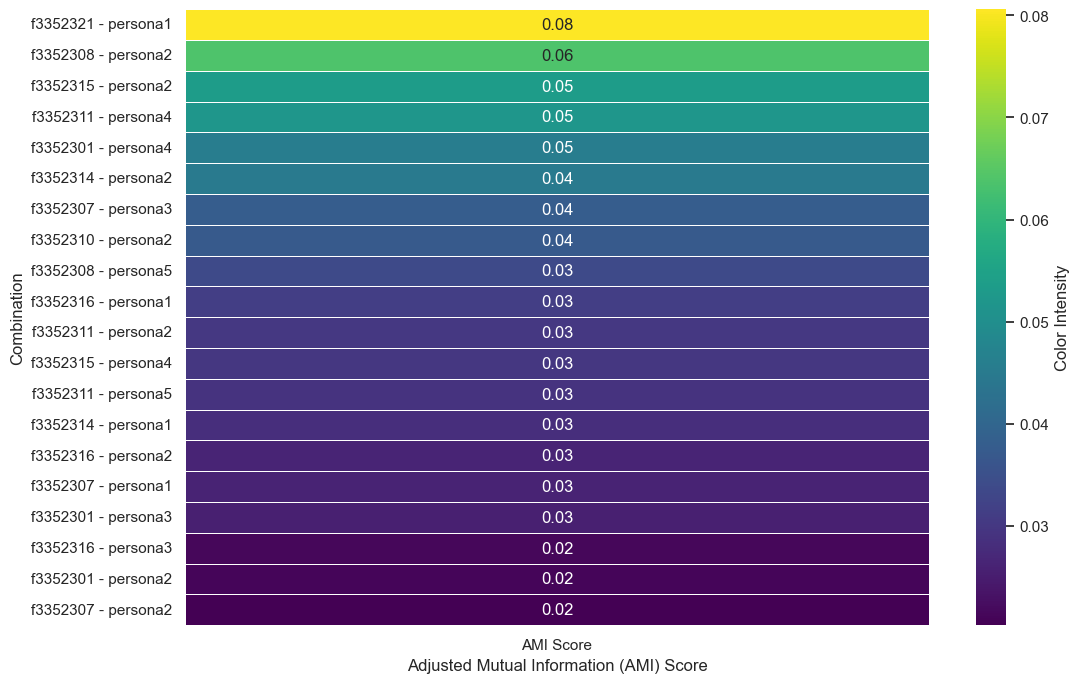

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by AMI Score in descending order
result_df_sorted = result_df.sort_values(by='AMI Score', ascending=False).reset_index()

# Filter out rows with negative AMI scores
filtered_result_df = result_df_sorted[result_df_sorted['AMI Score'] >= 0.02].reset_index()

# Create a heatmap from the filtered DataFrame
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_result_df.set_index('Combination')[['AMI Score']], cmap='viridis', annot=True, cbar_kws={'label': 'Color Intensity'}, fmt=".2f", linewidths=.5)
plt.xlabel("Adjusted Mutual Information (AMI) Score")
plt.ylabel("Combination")
plt.show()


In [39]:
# Extracting 'persona' from the 'Combination' column
filtered_result_df['persona'] = filtered_result_df['Combination'].str.split(' - ').str[1]

# Calculating the sum of AMI scores for each persona
sum_ami_per_persona = filtered_result_df.groupby('persona')['AMI Score'].sum().reset_index()

# Display the resulting DataFrame
print(sum_ami_per_persona.sort_values(by='AMI Score', ascending=False))

    persona  AMI Score
1  persona2   0.296939
0  persona1   0.166158
3  persona4   0.127445
2  persona3   0.084686
4  persona5   0.062792


   Our calculation here comes to  an agreement with the heatmap in the sense that gpt-persona 2 appears in higher AMI values more times than the other 4 gpt personas. In more detail, the sum of AMI scores for each persona appearance in our heatmap indicates that colectively persona 2 is closer to human based clustering.
   
   This indicates that the gpt-persona 2 has the best performing clustering in terms of that it comes to a better-than-random agreement with the human based clustering in contrast to the other personas we generated.

Note: AMI is not the perfect measure but allowed us to capture some truth about the human - gpt clustering!

Finally we select GPT-persona 2 (18th-century English Governess).

In this context, the outcome may seem surprising, considering that an 18th-century woman governess with a high level of education might not typically engage in activities related to clustering or have exposure to such modern concepts. It's worth noting that individuals in the 18th century, especially those in roles like a governess, might not have been familiar with the language or practices associated with clustering as we understand them today.

Therefore, the result, while unexpected, aligns with the notion that individuals from simpler, more traditional backgrounds may have a deeper understanding of proverbs.

But, this is a simulation and part of the reason is that we translated the proverbs from traditional greek language to english using open.ai's GPT.

Even if the proverbs in hand are original Greek proverbs, we cannot make any inferences with 100% certainty.

<h2 align='center'>Bonus</h2>

In [40]:
import pandas as pd
# url to scrape the csv from
url = "https://raw.githubusercontent.com/ipavlopoulos/paremia/main/data/balanced_corpus.csv"
# read the csv file with pandas
bonus_df = pd.read_csv(url)


In [41]:
import pandas as pd
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Print the entire DataFrame with a structured format
for index, row in bonus_df.iterrows():
    print(f"{index}: {row['text']}")

0: Γέλια σαν κομπολόγια
1: Καρδίαν καθαράν θέλ' ο Θεός
2: Ου Θεός κι ου γείτονας
3: Θέλει να κρυφθή πίσω από το δάχτυλό του
4: Όλοι κλαίν' τα χάλια τ'ς κι ο μυλωνάς τη δέσι
5: Σε ξένο φαγεί να μη βάνης άλας
6: Μου το βγαλε απ' τις μύτες
7: Γίγκι για κουρκούτ'
8: Ειναι στα ολίστια
9: Όξ' απού θάνατου!
10: Τον ζουρλόν 'ς του χωριάτη ξένοι πόνοι τον γεράζουν
11: Η μοίρα που σε μοίρανε, θα σε μυρολογούσε
12: Πέντε γρόσια ΄ς το πουγγί
13: Όλα διορθώνονται μονάχα του σπανού τα γένια
14: Τον καταφέρνω
15: Η κόττα γαργανίζοντας τα μάτια της θα βγάλη
16: Μ'κρος πιρδάρ - μιγάλους γουμάρ'
17: Σαν να τον λάβωσ' ο λύκος
18: Όποιος μ' θέλει το καλό, με κάν' και κλαίω, κι όποιος μ' θέλ' το κακό με κάν' και γελώ
19: Σαν εκκλησιά 'ς την ερημιά που δεν την λειτουργούνε έστε είν' αυτός οπ' αγαπά και δεν τον αγαπούνε
20: Ή χήνα ή σκατίνα
21: Με παίρνει ξωπίσω, με κυνηγάει, με παρακολουθεί
22: Ισιοζύγιαζε κι ακριβοπούλα
23: Όσον ξιτξγκαξίς τα σκατά, τόσον περισσότερον βρουμούν
24: Ξένο βιο καλολογάριασ' το

6878: Τάχει η γραι στο λοϊσμό τζη τα θωρεί και στο όνειρό τζη
6879: Το μυστικό σου μην το μιστεύγεσαι ποθές
6880: Σα θέλ' η νύφη κι η γαμπρός, τύφλες νάχ' η πεθερός
6881: Απού κάθεται μαργώνει κι΄απού προπατεί μαζώνει
6882: Βρωμεί δε βρωμεί ο δάχτυλός σου δικός σου είναι
6883: Του Γενάρη το λιατσάκι είναι πρίκες και φαρμάκι
6884: Από Άγουστο χειμώνα, κι από το Μάϊ καλοκαίρι
6885: Απου δεν πονεί, γοργοσυβάζεται
6886: Ουαί τω ανθρώπω εκείνω δι ου το σκάνδαλον έρχεται
6887: Άλλος ήχασκε κι' άλλος εμετάλαβε
6888: Γάτα με κουδούνια ποντικούς δεν πιάνει
6889: Μουδέ συ, παπά, κουκκιά, μουδέ γω σκαλιστικά
6890: Βόηθα, Παναγίαμου. Μα κούνα και τα χέρια σ'
6891: Καιρό θωρείς, καιρό μην αγοράζης
6892: Ντρέτος σαν τ΄αγκίστρι
6893: Η μοίρα μου τον άντρα μου καλό να τονέ κάμη
6894: Σαν δε γενή αλλού κακό, αλλού καλό δε γίνεται
6895: Σά θωρείς κανένα και πνίγεται παίξε του μιά να πάη παρά κάτω
6896: Τσύλισ' η μπλούκους τσ' ηύρι τ' τσαμάδα
6897: Δεν έχει δροσιά
6898: Κάλλιο μιαν ώρα πετεινός παρά τρακ

In [42]:
# Save the 'text' column to a text file
bonus_df['text'].to_csv('csv_folder/bonus_assignment.csv', index=False, encoding='utf-8')

bonus_df = pd.read_csv('csv_folder/bonus_assignment.csv')
print(bonus_df.columns)


Index(['text'], dtype='object')


At this point, we prompt gpt with a few shot learning technique.

The prompt was:

Create  10 clusters for the following proverbs(0-147): 

Example of clustering:

Cluster 1: Wisdom of Experience

Contains:

"He who doesn't know it buys it dearly."
"In all good things, God is present."
"The apple falls beneath the apple tree."

Cluster 2: Life's Ironies

Contains:

"You wanted it, and you got it."
"Rich people save for hard times, poor people waste their money."
"Make the cross, jump, and do whatever you want."

Cluster 3: Practical Advice

Contains:

"Treat others the way you want to be treated."
"If the shoe fits, wear it."
"Don't count your chickens before they hatch."


""" There are 148 proverbs following here(inside the gpt prompt.)"""


Explaining the above prompt, we used the example of the best performing gpt-persona discussed previously and we essential prompt gpt using few-shot prompting. All in all, we provided 3 examples and the results of gpt will be saved in a csv.

Also, it should be noted that openAi's playground did not allow us to cluster more than 147 proverbs.Lastly gpt was able to create clusters for only 42 out of 147 in total proverbs.

In [43]:
# Define the cluster assignments for each persona
cluster_assignments = {
    'bonus_clustering': {
        1: [0, 11, 34, 47, 76, 97, 115],
        2: [10, 28, 39, 66, 73, 93, 116],
        3: [0, 12, 35, 44, 60, 79, 118],
        4: [2, 4, 5, 16, 18, 19, 36, 41, 50, 52, 58, 63, 64, 71, 74, 78, 82, 83, 87, 92, 95, 108, 109, 110, 112, 121, 122, 134, 143, 146],
        5: [27, 30, 37, 55, 57, 123, 131],
        6: [6, 59, 72, 89, 96],
        7: [3, 13, 21, 23, 29, 32, 38, 40, 42, 45, 46, 51, 53, 54, 56, 61, 62, 67, 68, 75, 77, 80, 81, 84, 85, 88, 90, 91, 94, 98, 99, 101, 102, 103, 104, 106, 107, 111, 114, 117, 119, 124, 125, 126, 127, 128, 129, 130, 132, 136, 138, 139, 142, 144, 145, 147],
        8: [31, 33, 43, 48, 49, 65, 69, 86, 100, 113, 120, 135, 137, 140],
        9: [14, 15, 22, 24, 25, 26, 140, 141],
        10: [9, 20, 50, 70, 87, 105, 133, 148]
    },
}

# Create columns for each persona based on cluster assignments
for persona, cluster_ids in cluster_assignments.items():
    bonus_df[persona] = 0  # Initialize with 0

    for cluster_id, proverb_indices in cluster_ids.items():
        bonus_df.loc[proverb_indices, persona] = cluster_id

# Save the updated CSV
bonus_df.to_csv('csv_folder/bonus_assignment.csv', index=False)


In [44]:
bonus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   text              11500 non-null  object
 1   bonus_clustering  11500 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 179.8+ KB


In [45]:
bonus_df.bonus_clustering.value_counts()

0     11355
7        56
4        28
8        13
10        8
9         8
3         7
2         7
5         7
1         6
6         5
Name: bonus_clustering, dtype: int64

Note: The above is just an example.

Open Ai's gpt playground for free users does not allow to perform extensive prompts.

There are some ways to get around that like using payment methods of chat gpt's rest api.

There are  possibly "malicious" ways of creating python scripts to write prompts as parts of the overall dataset and scraping the results in order to cluster all of our 11500 proverbs.